### Comparison between Presto FT on monthly WorldCereal data and on Dekadal WorldCereal data

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
def add_plot(month, dek, cat_val, metric):
    labs = ['PrestoFT + RF', 'PrestoFT + LR', 'PrestoFT + Cb']
    # Create DataFrame
    df = pd.DataFrame({
        'Model': labs * 2,
        'Metric': ['Monthly'] * 3 + ['Dekadal'] * 3,
        'Score': month + dek
    })


    sns.barplot(data=df, x='Model', y='Score', hue='Metric')
    plt.title(f'{metric} Comparison')
    plt.xlabel('')
    plt.ylabel(f'{metric}')
    plt.ylim(0, 1)
    plt.xticks() 
    
    for p in plt.gca().patches:
        if p.get_height() == 0.0:
            continue
        else:
            plt.gca().annotate(f'{p.get_height():.3f}', 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), 
                               textcoords='offset points')

    plt.axhline(y=cat_val, color='red', linestyle='--', label='Catboost')

    plt.legend(
        bbox_to_anchor=(1.05, 1), loc='upper left')


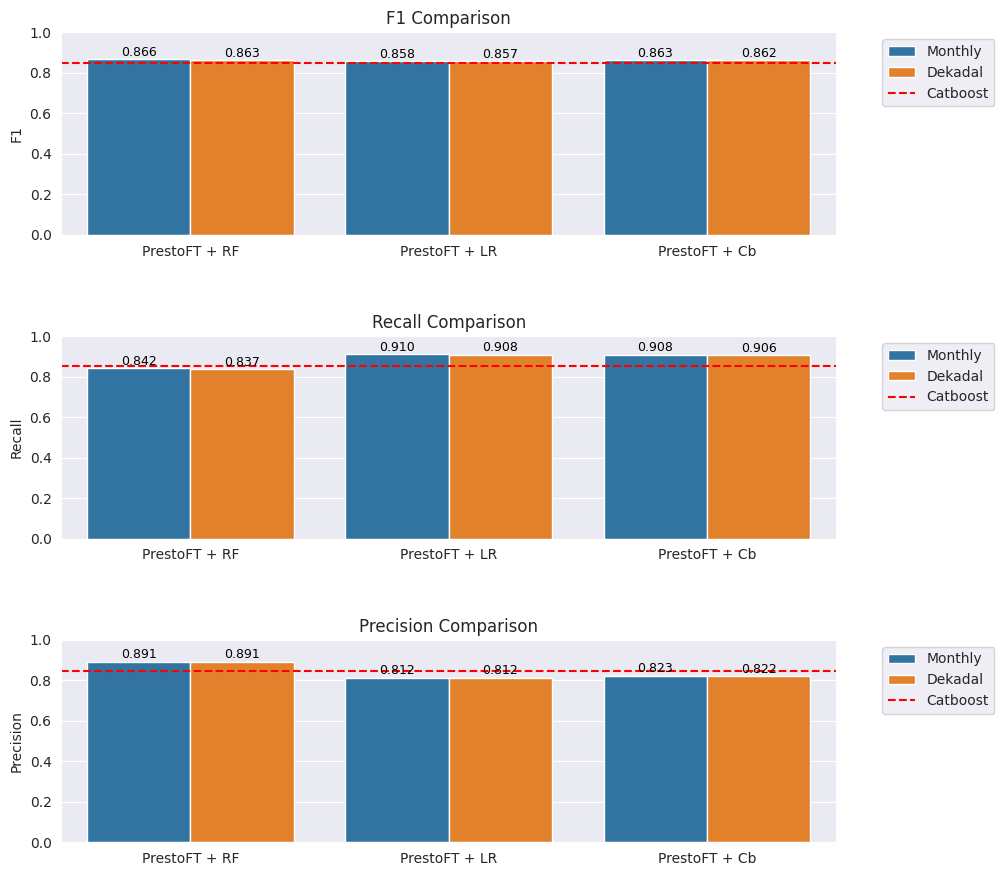

In [4]:
monthly_f1 = [0.8661, 0.8581, 0.8631]
monthly_recall = [0.8424, 0.9098, 0.9076]
monthly_precision = [0.8910, 0.8119, 0.8228]

dek_f1 = [0.8634, 0.8573, 0.8615]
dek_recall = [0.8371, 0.9082, 0.9057]
dek_precision = [0.8914, 0.8118, 0.8215] 

catboost_perf = [0.8489, 0.8517, 0.8462]


plt.figure(figsize=(10,18))
sns.set_style("darkgrid")
monthly_perf = [monthly_f1, monthly_recall, monthly_precision]
dek_perf = [dek_f1, dek_recall, dek_precision]
metrics = ['F1', 'Recall', 'Precision']
for i in range(len(catboost_perf)):
    plt.subplot(3, 1, i+1)
    add_plot(monthly_perf[i], dek_perf[i], catboost_perf[i], metrics[i])
plt.subplots_adjust(top=0.5, bottom=0.05, hspace=0.5)
plt.show()